<a href="https://colab.research.google.com/github/badrinarayanan02/machine_learning/blob/main/2348507_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading necessary packages

In [2]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import seaborn as sns


Reading the dataset

In [4]:
market_data = pd.read_csv('/content/Market_Basket_Optimisation.csv')
market_data

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
market_data.shape

(7500, 20)

Visualizing the most popular items using wordcloud

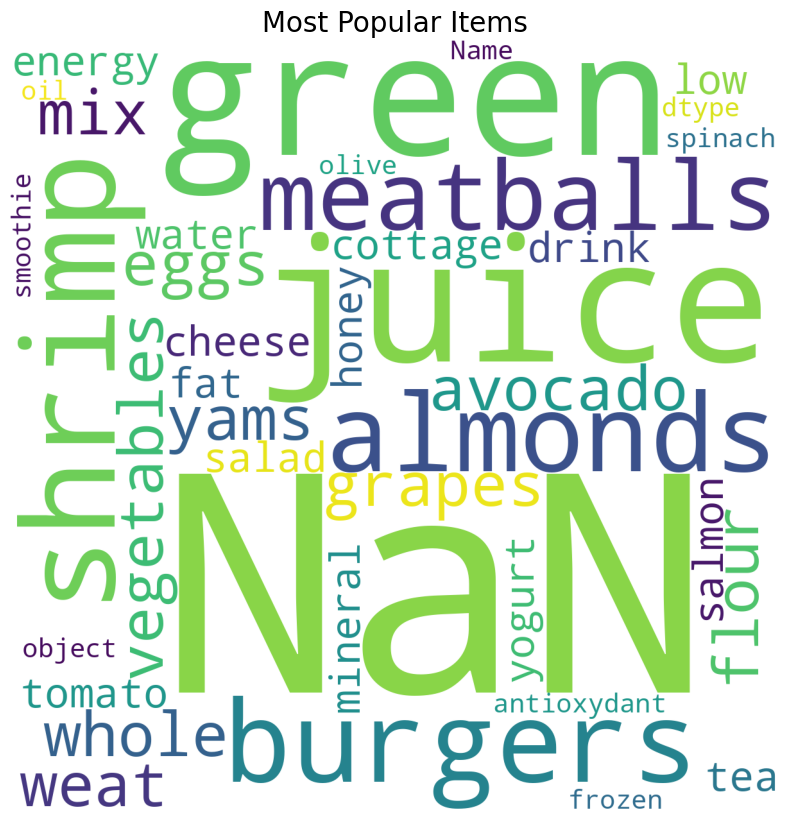

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(market_data.loc[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

Frequency of most popular items

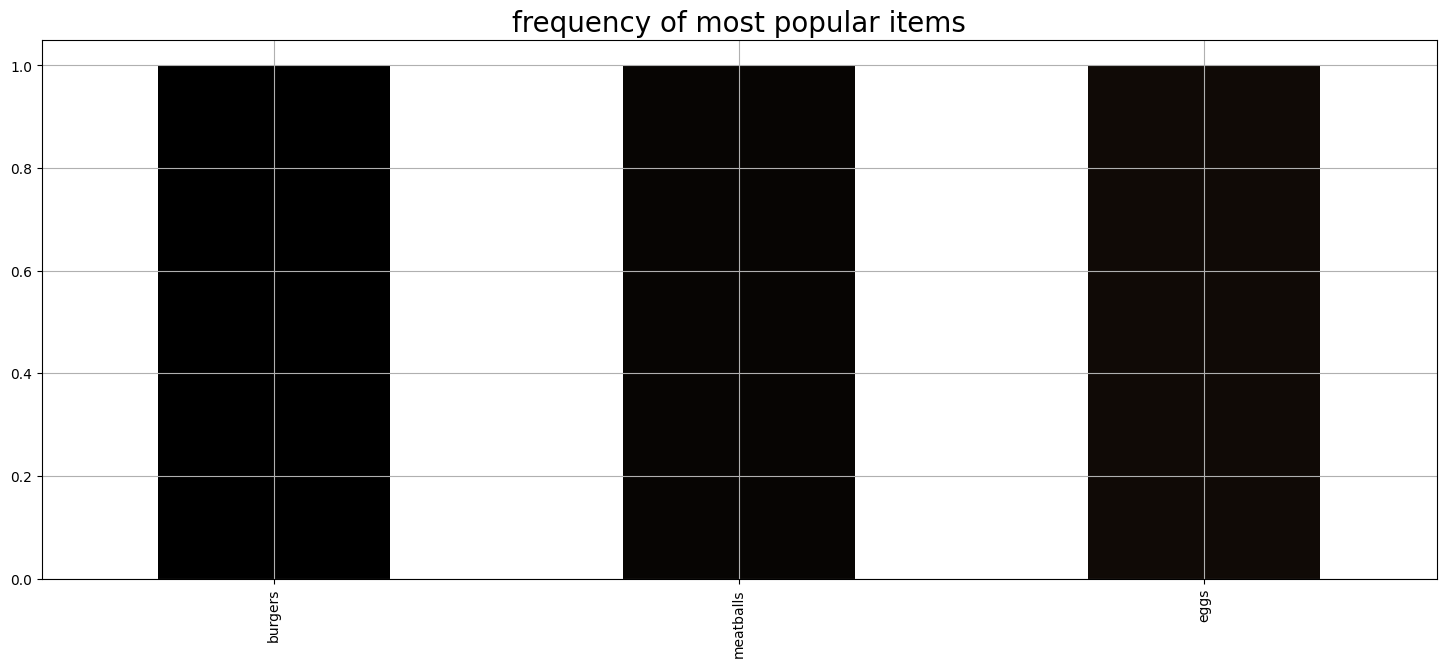

In [12]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
market_data.iloc[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [10]:
y = market_data.iloc[0].value_counts().head(50).to_frame()
y.index

Index(['burgers', 'meatballs', 'eggs'], dtype='object')

Creating a list for each transactions, list of transactions is the input format required by association mining algorithm to perform MBA.
Here each list of transactions represent each row.

In [ ]:
market_transactions = []
for index,row in market_data.iterrows():
    transaction = []
    for column in market_data.columns:
      value = row[column]
      if pd.notna(value):
         market_transactions.append(value)
    market_transactions.append(transaction)

for transaction in market_transactions:
  print(transaction)

Streaming output truncated to the last 5000 lines.
[]
black tea
green tea
light mayo
[]
grated cheese
herb & pepper
whole wheat pasta
pancakes
oil
[]
frozen vegetables
[]
tomatoes
parmesan cheese
vegetables mix
eggs
barbecue sauce
cookies
[]
shrimp
frozen vegetables
eggs
french fries
energy drink
[]
ham
red wine
spaghetti
mineral water
eggs
light mayo
[]
green tea
[]
red wine
mineral water
almonds
rice
green tea
[]
ground beef
cooking oil
toothpaste
[]
herb & pepper
ground beef
mineral water
flax seed
[]
cookies
hot dogs
[]
olive oil
butter
cake
cooking oil
cereals
pancakes
white wine
low fat yogurt
[]
frozen vegetables
milk
eggs
green tea
[]
frozen vegetables
mineral water
eggs
[]
cake
[]
frozen vegetables
meatballs
whole wheat rice
light cream
[]
chicken
energy drink
[]
pickles
mineral water
hand protein bar
[]
ham
tomatoes
mineral water
french fries
low fat yogurt
[]
turkey
burgers
eggs
french fries
shallot
energy drink
green tea
[]
burgers
french fries
[]
frozen vegetables
pepper
m

Converting data into binary matrix format using TransactionEncoder to perform exploratory analysis

In [ ]:
encoder = TransactionEncoder()
to_array = encoder.fit_transform(market_transactions)
df_transactions = pd.DataFrame(to_array,columns=encoder.columns_)
print(df_transactions)

                  &      a      b      c      d      e      f      g      h  \
0      False  False  False   True  False  False   True  False   True  False   
1      False  False   True   True  False  False   True  False  False  False   
2      False  False  False  False  False  False   True  False   True  False   
3      False  False  False  False  False  False  False  False  False  False   
4      False  False  False  False   True  False   True  False  False   True   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
36838  False  False  False  False  False  False   True  False   True  False   
36839   True  False  False  False  False  False   True   True  False   True   
36840   True  False   True  False   True  False   True  False   True  False   
36841   True  False   True  False  False  False  False   True   True  False   
36842  False  False  False  False  False  False  False  False  False  False   

       ...      p      r      s      t      u      

Performing association mining using apriori

In [ ]:
frequent_itemsets = apriori(df_transactions,min_support= 0.1,use_colnames = True)
print(frequent_itemsets)
# rules = association_rules(frequent_itemsets,metric='lift',min_threshold=1.0)
# rules = rules.sort_values(by="lift",ascending=False)
# print(rules)

      support            itemsets
0    0.373531                 ( )
1    0.457265                 (a)
2    0.137285                 (b)
3    0.280922                 (c)
4    0.633336                 (e)
..        ...                 ...
251  0.100372     ( , r, n, e, f)
252  0.120023     ( , r, n, e, i)
253  0.123307     ( , r, t, n, e)
254  0.107972     (a, r, t, n, e)
255  0.107972  ( , a, r, t, n, e)

[256 rows x 2 columns]


In [ ]:
rules = association_rules(frequent_itemsets,metric="confidence",min_threshold=0.2)
print(rules)

     antecedents      consequents  antecedent support  consequent support  \
0            ( )              (a)            0.373531            0.457265   
1            (a)              ( )            0.457265            0.373531   
2            ( )              (c)            0.373531            0.280922   
3            (c)              ( )            0.280922            0.373531   
4            ( )              (e)            0.373531            0.633336   
...          ...              ...                 ...                 ...   
1652         ( )  (a, r, t, n, e)            0.373531            0.107972   
1653         (a)  ( , r, t, n, e)            0.457265            0.123307   
1654         (r)  ( , a, t, n, e)            0.383221            0.109763   
1655         (t)  ( , a, r, n, e)            0.359661            0.123877   
1656         (n)  ( , a, r, t, e)            0.324784            0.146269   

       support  confidence      lift  leverage  conviction  zhangs_metric  